<a href="https://colab.research.google.com/github/AdariPraveen/AdariPraveen/blob/main/WEATHERDATACLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/AdariPraveen/AdariPraveen.git

fatal: destination path 'AdariPraveen' already exists and is not an empty directory.


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
weather_data=pd.read_csv('AdariPraveen/daily_weather.csv')
weather_data

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,Unnamed: 11
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,NaN
1,1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,19.426597,NaN
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,NaN
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,NaN
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000,NaN
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000,NaN
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000,NaN
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000,NaN


In [10]:
if weather_data.isnull().sum().any():
  #raise ValueError("Data contains missing values.Please handle preceeding values.")
  weather_data.fillna(weather_data.mean(),inplace=True)

In [11]:
X=weather_data[['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am','max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am','rain_duration_9am','relative_humidity_9am','relative_humidity_3pm']]

In [12]:
print(weather_data.columns)

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm', 'Unnamed: 11'],
      dtype='object')


In [13]:
y=weather_data['air_pressure_9am']

In [23]:
y=weather_data['air_temp_9am']

In [32]:
y=weather_data['avg_wind_direction_9am']

In [ ]:
y=weather_data['avg_wind_speed_9am']

In [ ]:
y=weather_data['max_wind_direction_9am']

In [ ]:
y=weather_data['max_wind_speed_9am']

In [ ]:
y=weather_data['rain_accumulation_9am']

In [ ]:
y=weather_data['rain_duration_9am']

In [ ]:
y=weather_data['relative_humidity_9am']

In [ ]:
y=weather_data['relative_humidity_3pm']

In [33]:
if weather_data.isnull().sum().any():
  weather_data.fillna(weather_data.mean(),inplace=True)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_estimators=100,random_state=42)
rfc.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [36]:
accuracy=rfc.score(X_test,y_test)
print(f'Model Accuracy:{accuracy:.3f}')

Model Accuracy:1.000


In [37]:
cv_score=cross_val_score(rfc,X,y,cv=5)
print(f'Cross Validation Score:{cv_score.mean():.3f}')

Cross Validation Score:1.000


In [38]:
feature_importance=rfc.feature_importances_
print('Feature Importance:')
for feature , importance in zip(X.columns,feature_importance):
  print(f'[feature]:{importance:.3f}')

Feature Importance:
[feature]:0.000
[feature]:0.000
[feature]:1.000
[feature]:0.000
[feature]:0.000
[feature]:0.000
[feature]:0.000
[feature]:0.000
[feature]:0.000
[feature]:0.000


In [39]:
y_pred=rfc.predict(X_test)
#print('Confusion Matrix:')
#print(confusion_matrix(y_test,y_pred))
print('Mean Squared Error:')
print(mean_squared_error(y_test,y_pred))
print('R Squared:')
print(r2_score(y_test,y_pred))
#print('Classification report:')
#print(classification_report(y_test,y_pred))
#print('Accuracy Score:')
#print(accuracy_score(y_test,y_pred))

Mean Squared Error:
2.3500139879475523
R Squared:
0.9995115486101877


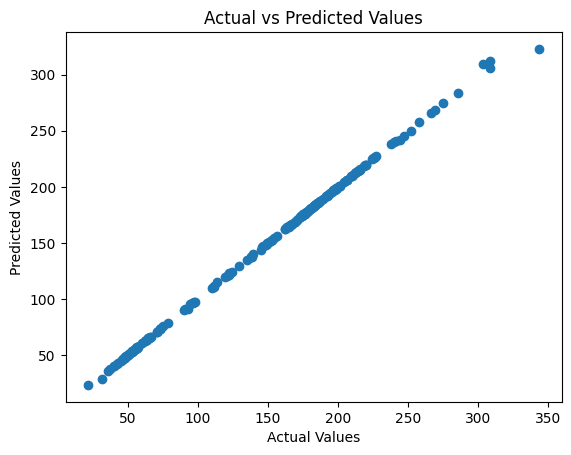

In [40]:
# Example of visualizing predictions vs actual values
#!pip install matplotlib
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()